Model will be trained by Google Colab in this juypter notebook

# Setup

In [ ]:
import sys
import tensorflow as tf

print(sys.version)
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
setup = "clone"
#Environment Setup (clone)

!git clone https://github.com/PeterLee2314/Fruit-Spoilage-Detection-Application.git
!git clone https://github.com/PeterLee2314/Fruit-Spoilage-Detection-Dataset.git


#Environment setup (cloud)
from google.colab import drive
drive.mount('/content/drive/')


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Cloning into 'Fruit-Spoilage-Detection-Application'...
remote: Enumerating objects: 20505, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 20505 (delta 4), reused 19 (delta 2), pack-reused 20470
Receiving objects: 100% (20505/20505), 1.69 GiB | 31.05 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Cloning into 'Fruit-Spoilage-Detection-Dataset'...
remote: Enumerating objects: 20217, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 20217 (delta 0), reused 3 (delta 0), pack-reused 20214
Receiving objects: 100% (20217/20217), 1.68 GiB | 35.85 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (20383/20383), done.
Mounted at /content/drive/


In [ ]:
# Dataset from github
import os
import random
import shutil
from sklearn.model_selection import train_test_split

source_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/complete'
train_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/train'
test_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/test'
valid_dir = '/content/Fruit-Spoilage-Detection-Dataset/dataset/validation'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# From github
source_directories = ['/content/Fruit-Spoilage-Detection-Dataset/dataset/complete']
# Complete -> test/train/validation -> tmp -> test/train/validation (move[prevent repeated image])
subdirectories = ['bad_apple', 'bad_banana', 'bad_orange',
                  'good_apple', 'good_banana', 'good_orange']


# Split ratios for train, test, and validation datasets (70% train, 20% test, 10% validation)
train_size = 0.7
test_size = 0.1
valid_size = 0.2

# Forced seeding
random.seed(42)
for source_dir in source_directories:
  for subdirectory in subdirectories:
      subdirectory_path = os.path.join(source_dir, subdirectory)
      print('the current path',subdirectory_path)
      sub_subdirectories = [name for name in os.listdir(subdirectory_path) if os.path.isdir(os.path.join(subdirectory_path, name))]

      train_subdirectory_dir = os.path.join(train_dir, subdirectory)
      test_subdirectory_dir = os.path.join(test_dir, subdirectory)
      valid_subdirectory_dir = os.path.join(valid_dir, subdirectory)

      os.makedirs(train_subdirectory_dir, exist_ok=True)
      os.makedirs(test_subdirectory_dir, exist_ok=True)
      os.makedirs(valid_subdirectory_dir, exist_ok=True)

      # (Optional Move/Copy) pattern + "/*/*" with glob.glob(pattern) for copy
      # for sub_subdirectory in sub_subdirectories:
      #   pattern = os.path.join(subdirectory_path,sub_subdirectory) + "/*/*"
      #   for img in glob.glob(pattern):
      #       shutil.copy(img, destination_path)

      for sub_subdirectory in sub_subdirectories:
          sub_subdirectory_path = os.path.join(subdirectory_path, sub_subdirectory)
          files = os.listdir(sub_subdirectory_path)
          print("sub_subdirectory_path",sub_subdirectory_path)
          # Split the files into train, test, and validation sets
          train_files, test_valid_files = train_test_split(files, test_size=(test_size + valid_size), random_state=42, shuffle=True)
          test_files, valid_files = train_test_split(test_valid_files, test_size=(valid_size / (test_size + valid_size)), random_state=42, shuffle=True)

          # Move all images inside train/test/validation folder
          for file in train_files:
              src = os.path.join(sub_subdirectory_path, file)
              dst = os.path.join(train_subdirectory_dir, file)
              shutil.move(src, dst)
              #shutil.copy(src, dst)

          for file in test_files:
              src = os.path.join(sub_subdirectory_path, file)
              dst = os.path.join(test_subdirectory_dir, file)
              shutil.move(src, dst)
              #shutil.copy(src, dst)

          for file in valid_files:
              src = os.path.join(sub_subdirectory_path, file)
              dst = os.path.join(valid_subdirectory_dir, file)
              shutil.move(src, dst)
              #shutil.copy(src, dst)

      # Print len for each subdirectories in train/test/validation folder
      train_count = len(os.listdir(train_subdirectory_dir))
      test_count = len(os.listdir(test_subdirectory_dir))
      valid_count = len(os.listdir(valid_subdirectory_dir))

      print(f"Number of files in {train_subdirectory_dir}: {train_count}")
      print(f"Number of files in {test_subdirectory_dir}: {test_count}")
      print(f"Number of files in {valid_subdirectory_dir}: {valid_count}")

the current path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_apple
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_apple/bad_apple1
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_apple/bad_apple2
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_apple/bad_apple3
Number of files in /content/Fruit-Spoilage-Detection-Dataset/dataset/train/bad_apple: 2813
Number of files in /content/Fruit-Spoilage-Detection-Dataset/dataset/test/bad_apple: 401
Number of files in /content/Fruit-Spoilage-Detection-Dataset/dataset/validation/bad_apple: 807
the current path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_banana
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_banana/bad_banana2
sub_subdirectory_path /content/Fruit-Spoilage-Detection-Dataset/dataset/complete/bad_banana/bad_banana1
sub_subdirectory_path /content/Fruit-S

# Class setup

In [ ]:
import os
import shutil

# Define the source and destination directories
temp_directory = '/content/tmp'

# Create the temp directory if it doesn't exist
os.makedirs(temp_directory, exist_ok=True)

# Move data from train_dir to temp_directory
train_fresh_dir = os.path.join(temp_directory, 'train', 'fresh')
train_spoiled_dir = os.path.join(temp_directory, 'train', 'spoiled')
os.makedirs(train_fresh_dir, exist_ok=True)
os.makedirs(train_spoiled_dir, exist_ok=True)

for subdirectory in os.listdir(train_dir):
    train_subdirectory_dir = os.path.join(train_dir, subdirectory)
    for file in os.listdir(train_subdirectory_dir):
        src = os.path.join(train_subdirectory_dir, file)
        dst = os.path.join(train_fresh_dir if 'good' in subdirectory else train_spoiled_dir, file)
        shutil.move(src, dst)

# Move data from test_dir to temp_directory
test_fresh_dir = os.path.join(temp_directory, 'test', 'fresh')
test_spoiled_dir = os.path.join(temp_directory, 'test', 'spoiled')
os.makedirs(test_fresh_dir, exist_ok=True)
os.makedirs(test_spoiled_dir, exist_ok=True)

for subdirectory in os.listdir(test_dir):
    test_subdirectory_dir = os.path.join(test_dir, subdirectory)
    for file in os.listdir(test_subdirectory_dir):
        src = os.path.join(test_subdirectory_dir, file)
        dst = os.path.join(test_fresh_dir if 'good' in subdirectory else test_spoiled_dir, file)
        shutil.move(src, dst)

# Move data from valid_dir to temp_directory
valid_fresh_dir = os.path.join(temp_directory, 'validation', 'fresh')
valid_spoiled_dir = os.path.join(temp_directory, 'validation', 'spoiled')
os.makedirs(valid_fresh_dir, exist_ok=True)
os.makedirs(valid_spoiled_dir, exist_ok=True)

for subdirectory in os.listdir(valid_dir):
    valid_subdirectory_dir = os.path.join(valid_dir, subdirectory)
    for file in os.listdir(valid_subdirectory_dir):
        src = os.path.join(valid_subdirectory_dir, file)
        dst = os.path.join(valid_fresh_dir if 'good' in subdirectory else valid_spoiled_dir, file)
        shutil.move(src, dst)

In [ ]:
#Filtering Image(Non JPEG, PNG, GIF, BMP)
from pathlib import Path
import imghdr
import os
data_dir = temp_directory
del_oper = 0
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png", "jpg"]

for filepath in Path(data_dir).rglob("*"):
    if filepath.is_file():
        file_extension = filepath.suffix.lower()[1:]
        if file_extension not in img_type_accepted_by_tf:
            print(f"{filepath} is not accepted by TensorFlow. Deleting...")
            os.remove(filepath)
            del_oper += 1

print("Total files deleted:", del_oper)

Total deletion: 0


Found 22460 files belonging to 2 classes.
Found 6530 files belonging to 2 classes.


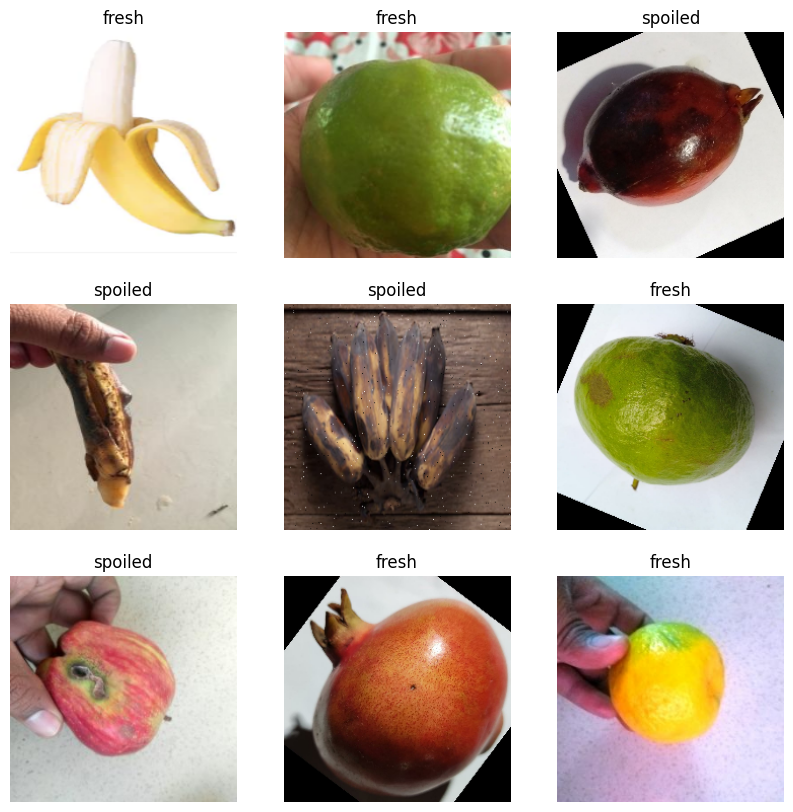

In [ ]:
#Show Random Image
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential, load_model
from tensorflow import keras
from keras import Model
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from keras.applications import MobileNetV3Small
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import random
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from keras.layers import GlobalAveragePooling2D

BATCH_SIZE = 64
IMG_SIZE = (224, 224)
train_dir = temp_directory + '/train'
validation_dir = temp_directory + '/validation'
test_dir = temp_directory + '/test'

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#Test set and validation set division
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Number of validation batches: 83
Number of test batches: 20


In [ ]:
# Model A
from keras import layers
# Add MobileNetV3Small as the base model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.CenterCrop(height=224, width=224),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.GaussianNoise(0.2),
])
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
#x = GlobalMaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
x = layers.Dense(224, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1,activation='sigmoid', name='label')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
# Model B
import tensorflow as tf
from keras import layers
from keras.applications import MobileNetV3Small
from keras import regularizers
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.CenterCrop(height=224, width=224),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.GaussianNoise(0.2),
])

preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(1e-3))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(1e-3))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(1e-3))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid', name='label')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

4334752/4334752 [==============================] - 0s 0us/step


In [ ]:
%load_ext tensorboard
%tensorboard --logdir 'logs'

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')
checkpoint_path = "training_1/cp.ckpt"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1,
                          write_graph=True, write_images=True)

history = model.fit(
    train_dataset,
    epochs=64,
    validation_data=validation_dataset,
    callbacks=[tensorboard_callback,early_stopping,checkpoint]
)
model.save('fruit_spoilage_detection_model.keras')

Epoch 1/64
351/351 [==============================] - 129s 332ms/step - loss: 0.3775 - accuracy: 0.8630 - val_loss: 0.2254 - val_accuracy: 0.9042
Epoch 2/64
351/351 [==============================] - 134s 378ms/step - loss: 0.2062 - accuracy: 0.9162 - val_loss: 0.1684 - val_accuracy: 0.9333
Epoch 3/64
351/351 [==============================] - 110s 311ms/step - loss: 0.1627 - accuracy: 0.9370 - val_loss: 0.1222 - val_accuracy: 0.9564
Epoch 4/64
351/351 [==============================] - 107s 303ms/step - loss: 0.1436 - accuracy: 0.9446 - val_loss: 0.1389 - val_accuracy: 0.9459
Epoch 5/64
351/351 [==============================] - 102s 289ms/step - loss: 0.1271 - accuracy: 0.9509 - val_loss: 0.1185 - val_accuracy: 0.9533
Epoch 6/64
351/351 [==============================] - 92s 258ms/step - loss: 0.1164 - accuracy: 0.9553 - val_loss: 0.1208 - val_accuracy: 0.9575
Epoch 7/64
351/351 [==============================] - 112s 315ms/step - loss: 0.1022 - accuracy: 0.9607 - val_loss: 0.0882 - 

In [ ]:
# Load Best Model
loaded_model = keras.models.load_model(checkpoint_path)

# Check Load Successfully
loss, acc = model.evaluate(test_dataset, verbose=2)
print("Current model, accuracy: {:5.2f}%".format(100 * acc))

loss, acc = loaded_model.evaluate(test_dataset, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
model = loaded_model

In [ ]:
history.history

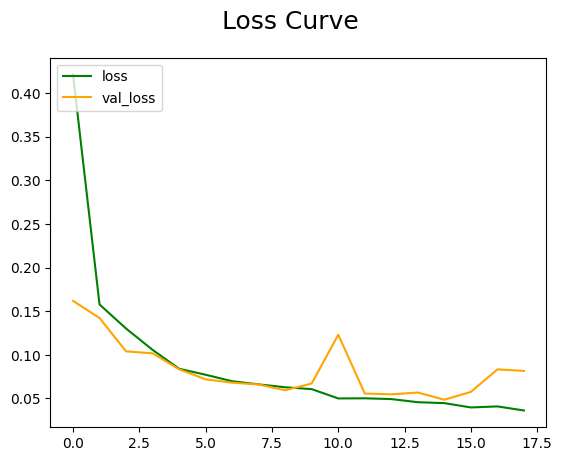

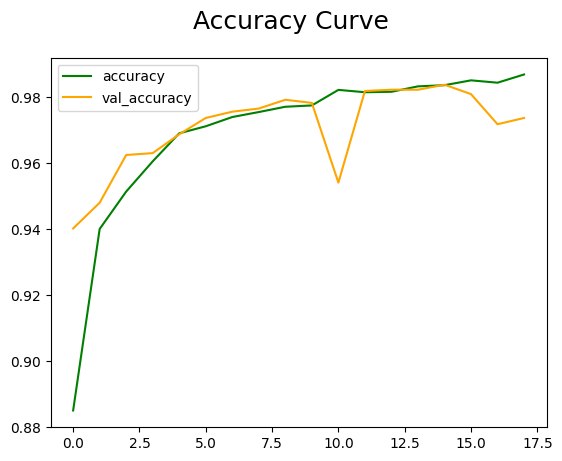

In [ ]:
# Train/Valid Performance
# Loss
performance = plt.figure()
plt.plot(history.history['loss'], color='green', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
performance.suptitle('Loss Curve', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Accuracy
performance = plt.figure()
plt.plot(history.history['accuracy'], color='green', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
performance.suptitle('Accuracy Curve', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Convert to Tensorflow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# (When cant download tflite through local)
with open('/content/drive/MyDrive/TensorFlow FYP/Model/model.tflite', 'wb') as f:
  f.write(tflite_model)

Predictions:
 [0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0]
Labels:
 [0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0]


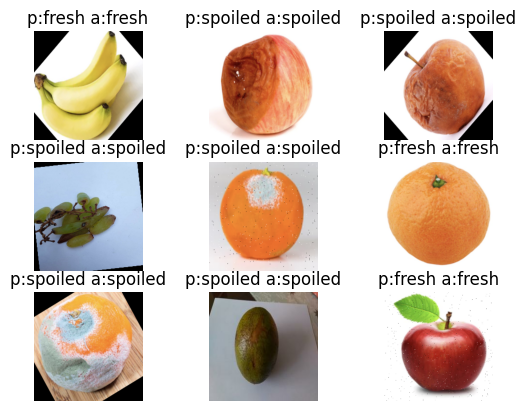

In [ ]:
# Lite model testing
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
image_size = (224, 224, 3)
output = []


image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
image = image_batch[0]
image_input = np.expand_dims(image, axis=0)
for i in range(32):
  image_input = np.expand_dims(image_batch[i],axis=0)
  interpreter.set_tensor(input_details[0]['index'], image_input)
  interpreter.invoke()
  output_data = interpreter.get_tensor(output_details[0]['index']).flatten()
  output.append(output_data)
output = np.array(output).flatten()


predictions = np.where(output <= 0.5, 0, 1)
print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title("p:" + class_names[predictions[i]] + " a:" + class_names[label_batch[i]])
  plt.axis("off")
plt.show()

20/20 [==============================] - 7s 312ms/step - loss: 0.0435 - accuracy: 0.9867
Test accuracy : 0.9867187738418579
[1.3071014e-01 1.0000000e+00 9.9958760e-01 3.4922111e-13 1.2989047e-03
 9.6847230e-01 9.9344915e-01 8.5787165e-01 3.2288692e-05 9.9999535e-01
 3.7111394e-02 3.1656553e-05 2.1433765e-05 9.9990201e-01 1.8554035e-03
 1.1071407e-03 1.6176160e-02 9.9999976e-01 1.0000000e+00 1.0000000e+00
 1.6651271e-02 4.9775849e-06 3.0424094e-01 2.6725357e-02 3.4511671e-05
 9.9977547e-01 1.8138470e-04 3.9866769e-01 1.2285700e-03 9.9999881e-01
 9.9999559e-01 9.8886275e-01 4.0112622e-04 2.0920014e-02 4.8536811e-02
 9.9609452e-01 6.4989012e-03 2.0186182e-03 4.4139571e-04 8.7408757e-01
 9.8850292e-01 9.9882370e-01 9.7595996e-01 8.4284729e-01 9.9999952e-01
 9.9518871e-01 9.9998891e-01 8.8469740e-03 3.2883253e-02 9.9982470e-01
 9.7418606e-01 3.2920358e-03 3.5644269e-01 4.0766060e-02 1.0000000e+00
 1.5761440e-01 4.8722300e-01 2.1440510e-03 4.5666423e-02 9.9983239e-01
 2.9413260e-03 1.0000000

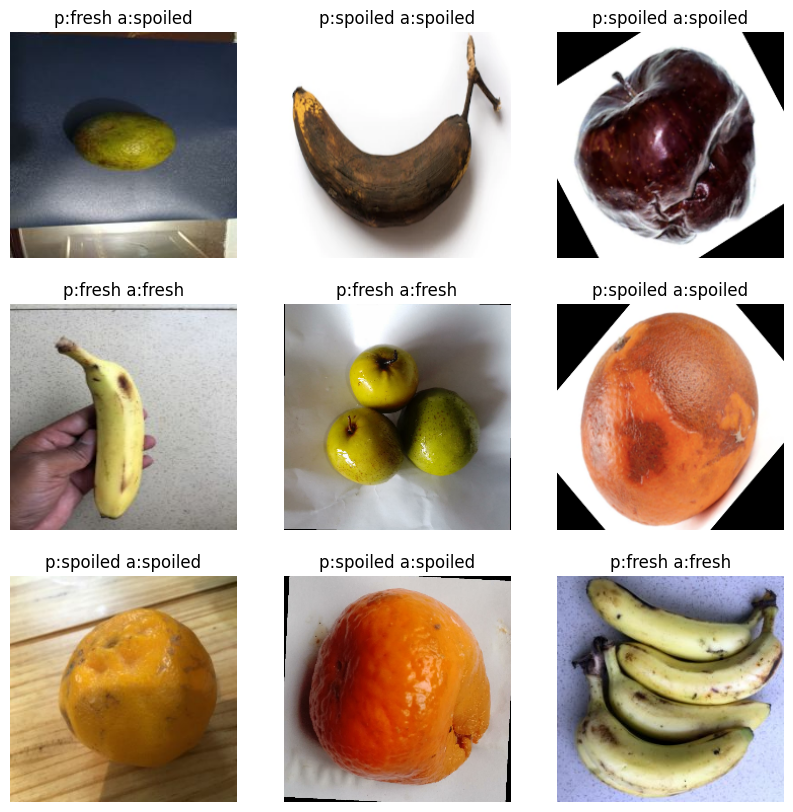

In [ ]:
# Test set evaluate + Metric Evaluation
from keras.metrics import Precision, Recall, BinaryAccuracy
#model = tf.keras.models.load_model('fruit_spoilage_detection_model.keras')

loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

# Load Restored Model
# loss, accuracy = loaded_model.evaluate(test_dataset)
# print("Restored model, accuracy: {:5.2f}%".format(100 * accuracy))


image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

print(predictions)
predictions = tf.where(predictions <= 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

pre = Precision()
re = Recall()
ba = BinaryAccuracy()

for batch in test_dataset.as_numpy_iterator():
  X,y = batch
  preY = model.predict(X)
  pre.update_state(y, preY)
  re.update_state(y, preY)
  ba.update_state(y, preY)

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, BinaryAccuracy:{ba.result().numpy()}')

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title("p:" + class_names[predictions[i]] + " a:" + class_names[label_batch[i]])
  plt.axis("off")

In [ ]:
# Custom Validation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)
#model = tf.keras.models.load_model('/content/drive/MyDrive/TensorFlow FYP/99fruit_spoilage_detection_model.keras')
#model = tf.keras.models.load_model('/content/fruit_spoilage_detection_model2.keras')
#model = tf.keras.models.load_model('/content/Model(Small10).keras')
def imshow(img):
  image = plt.imread(img)
  plt.imshow(image)
  plt.show()
img_path = '/content/drive/MyDrive/TensorFlow FYP/custom'
imgs = []

pattern_img = img_path + "/*/*"
for img in glob.glob(pattern_img):
    if os.path.isfile(img):
      imgs.append(img)
      #print(img)
print(imgs)

pattern_img = img_path + "/*"
for img in glob.glob(pattern_img):
    if os.path.isfile(img):  # Check if it's a file and not a directory
        imgs.append(img)
        #print(img)

threshold = 0.5

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/1.jpg', '/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/2.jpg', '/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/3.jpg', '/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/zoomed.jpg', '/content/drive/MyDrive/TensorFlow FYP/custom/fresh/images (2).jpg', '/content/drive/MyDrive/TensorFlow FYP/custom/fresh/images (4).jpg', '/content/drive/MyDrive/TensorFlow FYP/custom/fresh/images (5).jpg']


/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/1.jpg
1/1 [==============================] - 2s 2s/step
/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/2.jpg
1/1 [==============================] - 0s 31ms/step
/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/3.jpg
1/1 [==============================] - 0s 25ms/step
/content/drive/MyDrive/TensorFlow FYP/custom/spoiled/zoomed.jpg
1/1 [==============================] - 0s 27ms/step
/content/drive/MyDrive/TensorFlow FYP/custom/fresh/images (2).jpg
1/1 [==============================] - 0s 25ms/step
/content/drive/MyDrive/TensorFlow FYP/custom/fresh/images (4).jpg
1/1 [==============================] - 0s 24ms/step
/content/drive/MyDrive/TensorFlow FYP/custom/fresh/images (5).jpg
1/1 [==============================] - 0s 39ms/step
/content/drive/MyDrive/TensorFlow FYP/custom/下載.jpg
1/1 [==============================] - 0s 41ms/step
/content/drive/MyDrive/TensorFlow FYP/custom/下載 (1).jpg
1/1 [==============================] - 

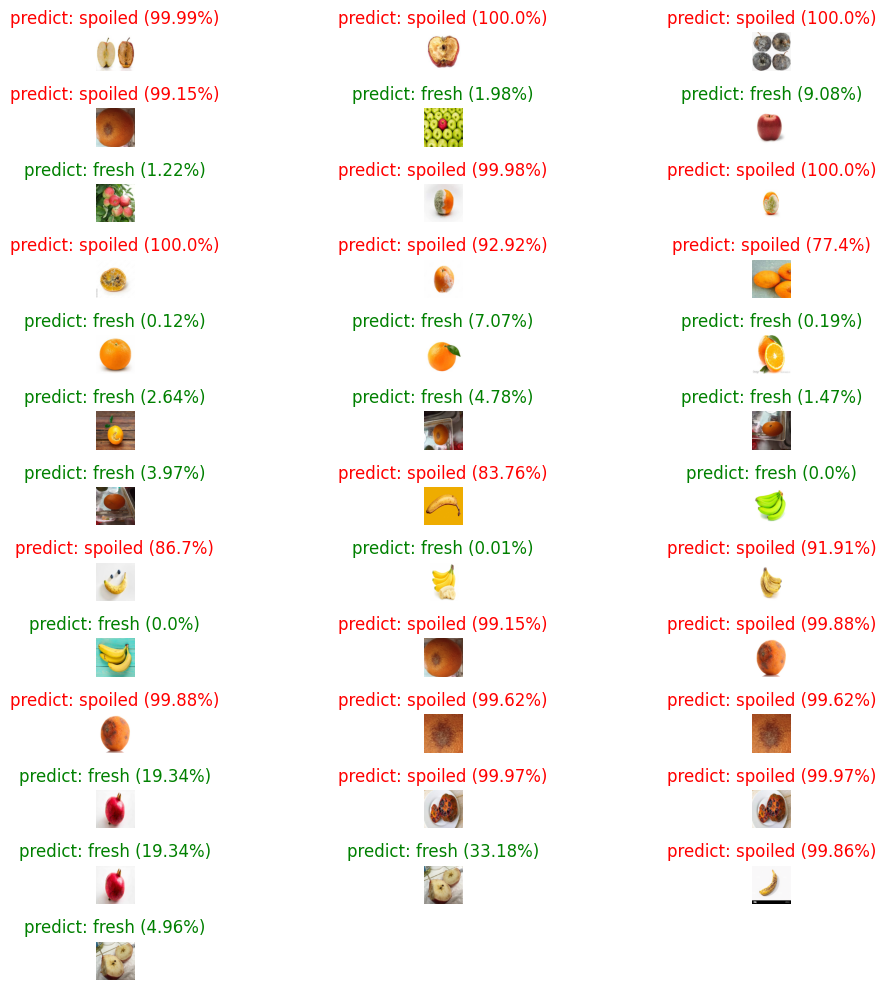

In [ ]:
#Custom Validation Displays
plt.figure(figsize=(10, 10))

num_images = len(imgs)  # Display all images

num_rows = (num_images - 1) // 3 + 1  # Calculate the number of rows needed


for i in range(num_images):
    img_file = imgs[i]
    print(img_file)
    img = tf.keras.preprocessing.image.load_img(img_file, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = preprocess_input(img)
    img = tf.expand_dims(img, axis=0)

    predictions = model.predict(img)
    predicted_class = "spoiled" if predictions[0] >= threshold else "fresh"
    ax = plt.subplot(num_rows, 3, i + 1)
    plt.imshow(img[0].numpy().astype("uint8"))  # Convert to NumPy array
    percentage = round(float(predictions[0])*100, 2)
    title = f"predict: {predicted_class} ({round(float(predictions)*100, 2)}%)"
    if predicted_class == 'fresh':
      plt.title(title, color='green')
    else:
      plt.title(title, color='red')
    plt.axis("off")

plt.tight_layout()
plt.show()